## Importing libraries

In [165]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers
 
import tensorflow as tf
import matplotlib.pyplot as plt

In [166]:
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

## Loading dataset

In [167]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
 
print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

(404, 13)


Input features:  [  1.232   0.      8.14    0.      0.538   6.142  91.7     3.977   4.
 307.     21.    396.9    18.72 ]


Output target:  15.2


In [168]:
boston_features = {
    'Average Number of Rooms':5,
}
 
X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d.shape)
 
X_test_1d = X_test[:, boston_features['Average Number of Rooms']]

(404,)


## Visualizations

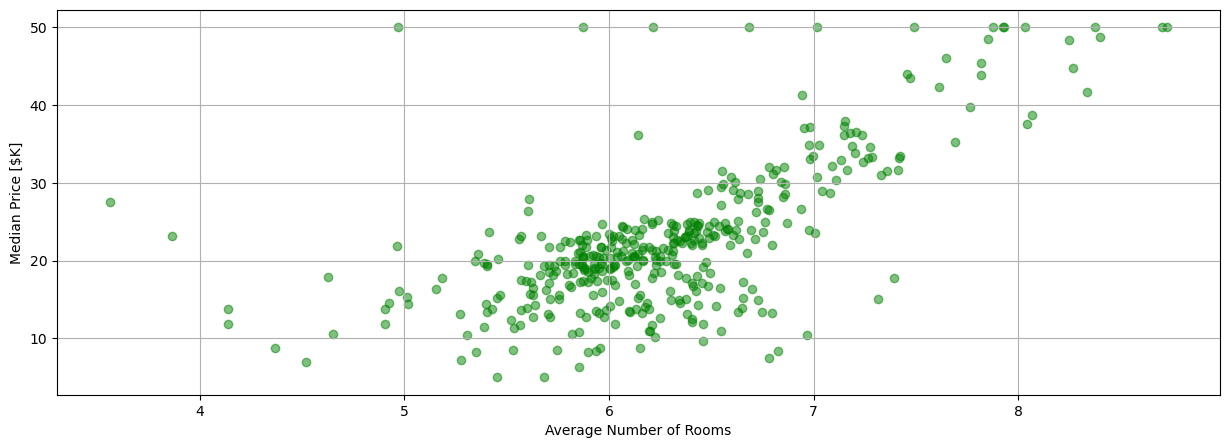

In [169]:
plt.figure(figsize=(15, 5))
 
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color='green', alpha=0.5);

## Model Building

In [170]:
model = Sequential()
 
# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))
 
# Display a summary of the model architecture.
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [171]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005), loss='mse')

## Model Fitting

In [172]:
history = model.fit(X_train_1d, 
                    y_train, 
                    batch_size=16, 
                    epochs=101, 
                    validation_split=0.3)

Epoch 1/101
18/18 [==============================] - 0s 15ms/step - loss: 1081.3220 - val_loss: 1177.7273
Epoch 2/101
18/18 [==============================] - 0s 13ms/step - loss: 1034.2263 - val_loss: 1133.5219
Epoch 3/101
18/18 [==============================] - 0s 13ms/step - loss: 993.6591 - val_loss: 1092.0139
Epoch 4/101
18/18 [==============================] - 0s 13ms/step - loss: 954.7332 - val_loss: 1051.2831
Epoch 5/101
18/18 [==============================] - 0s 13ms/step - loss: 916.2800 - val_loss: 1010.9376
Epoch 6/101
18/18 [==============================] - 0s 13ms/step - loss: 878.7045 - val_loss: 971.8485
Epoch 7/101
18/18 [==============================] - 0s 12ms/step - loss: 842.1305 - val_loss: 933.2347
Epoch 8/101
18/18 [==============================] - 0s 12ms/step - loss: 806.5314 - val_loss: 896.2798
Epoch 9/101
18/18 [==============================] - 0s 13ms/step - loss: 771.7280 - val_loss: 859.5245
Epoch 10/101
18/18 [==============================] - 0s 

18/18 [==============================] - 0s 13ms/step - loss: 56.5960 - val_loss: 77.9972
Epoch 80/101
18/18 [==============================] - 0s 13ms/step - loss: 56.5471 - val_loss: 77.8562
Epoch 81/101
18/18 [==============================] - 0s 13ms/step - loss: 56.5260 - val_loss: 77.9700
Epoch 82/101
18/18 [==============================] - 0s 13ms/step - loss: 56.5639 - val_loss: 77.9754
Epoch 83/101
18/18 [==============================] - 0s 13ms/step - loss: 56.5232 - val_loss: 77.9932
Epoch 84/101
18/18 [==============================] - 0s 13ms/step - loss: 56.5172 - val_loss: 77.9388
Epoch 85/101
18/18 [==============================] - 0s 13ms/step - loss: 56.5176 - val_loss: 77.8106
Epoch 86/101
18/18 [==============================] - 0s 13ms/step - loss: 56.4955 - val_loss: 77.8188
Epoch 87/101
18/18 [==============================] - 0s 13ms/step - loss: 56.4775 - val_loss: 77.7967
Epoch 88/101
18/18 [==============================] - 0s 13ms/step - loss: 56.4675 - v

## Validation

In [173]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

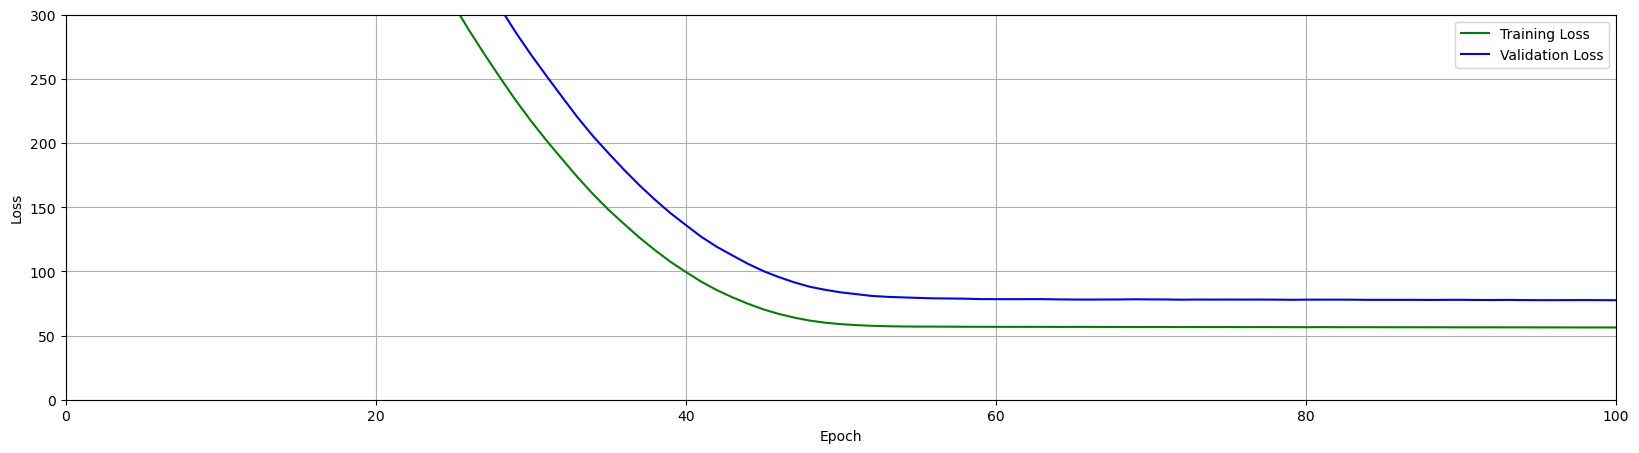

In [174]:
plot_loss(history)

## Prediction

In [175]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))

1/1 [==============================] - 0s 36ms/step
Predicted price of a home with 3 rooms: $12.6K
Predicted price of a home with 4 rooms: $15.5K
Predicted price of a home with 5 rooms: $18.5K
Predicted price of a home with 6 rooms: $21.5K
Predicted price of a home with 7 rooms: $24.4K


In [176]:
# Generate feature data that spans the range of interest for the independent variable.
x = tf.linspace(3, 9, 10)
 
# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 [==============================] - 0s 21ms/step


## Conclusion

In [177]:
def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

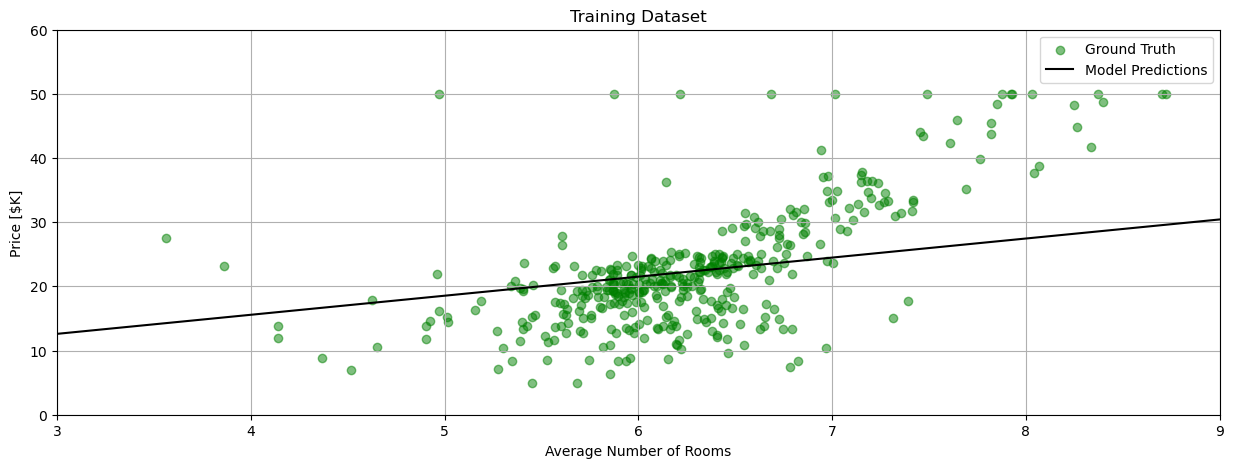

In [178]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

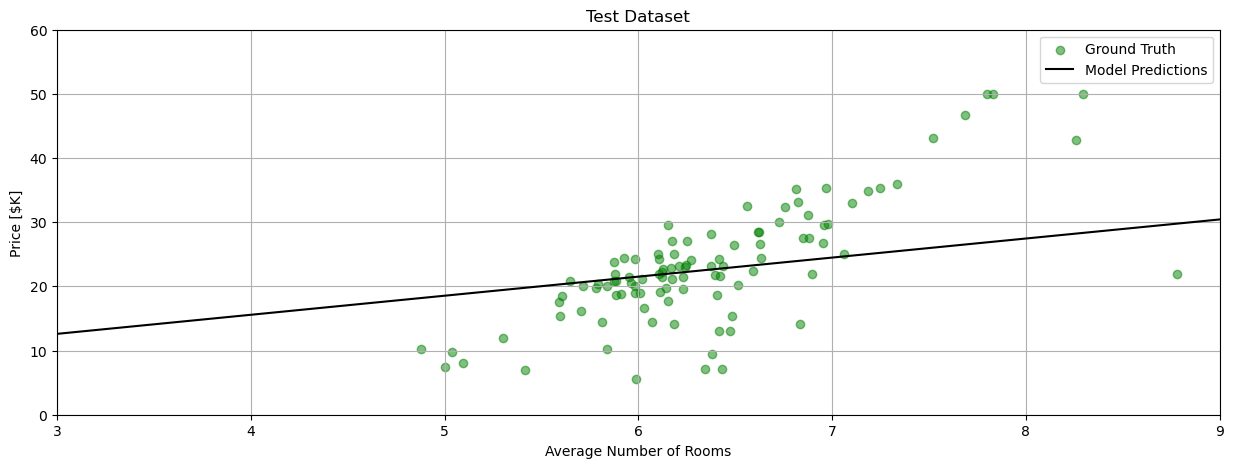

In [179]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')